## Final project

text stuff to do: 
- clean encoding (ÛÏ) 
- count hashtags, @ signs, urls, punctuation, sentence to punctuation ratio
- :pparrot: emojis???
- general research to tokenize tweets & try out different tokenizing methods
- remove punctuation 
- use SVD to condense, try PCA
- remove stuff to make it look like final project
- research to see how we can use location or keywords

ask john:
- best way to clean encoding
- how to add features to model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import glob

In [2]:
df = pd.read_csv('/Users/nikhilbhargava/Documents/Duke/ids-703/final-project/final-project-green/Data/train.csv')

In [15]:
df.sample(10)

,id,keyword,location,text,target
3187,4576,emergency%20plan,Im In Route,ÛÏ@based_georgie: yo forreal we need to have ...,1
6483,9270,sunk,In your mind,The feeling of lonelyness has sunk into me str...,0
6294,8993,stretcher,NaN,@Coach_Keith44 @HannoMottola @TRPreston01 @mlr...,0
3219,4619,emergency%20services,"Los Angeles, CA",Want to work in #MissionHills CA? View our lat...,0
585,845,bioterror,NaN,House Energy &amp;amp; Commerce subcommittee t...,1
7184,10294,weapon,New York 2099,@DwarfOnJetpack I guess I can say you and me m...,0
3542,5064,famine,"Kyiv, Ukraine",#Russia 'food crematoria' provoke outrage in c...,1
3945,5609,flood,New York,12' 72W CREE LED Work Light Bar Alloy Spot Flo...,0
166,241,airplane%20accident,Fashion Heaven. IG: TMId_,My phone looks like it was in a car ship airpl...,0
1418,2046,casualties,Insula Barataria,ÛÏThe road to power is paved with hypocrisy a...,0


In [5]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
stops = set(stopwords.words('english'))
stops = map(lambda x:x.lower(),stops)
vectorizer = TfidfVectorizer(stop_words=stops)
vectorizer.fit(X)

# extract features
x_train = vectorizer.transform(X_train)
x_test = vectorizer.transform(X_test)

In [7]:
print(x_train.shape, x_test.shape)

(5329, 21498) (2284, 21498)


In [8]:
from sklearn.linear_model import LogisticRegression

review_classifier = LogisticRegression(random_state = 0).fit(x_train, y_train)

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

# precision, recall, f1, and average precision below
y_pred = review_classifier.predict(x_test)
print("Precision:", round(precision_score(y_test, y_pred, average='binary'),2))
print("Recall:", round(recall_score(y_test, y_pred, average='binary'),2))
print("F1:", round(f1_score(y_test, y_pred, average='binary'),2))
print("Average Precision:", round(average_precision_score(y_test, y_pred),2))

Precision: 0.85
Recall: 0.65
F1: 0.74
Average Precision: 0.7


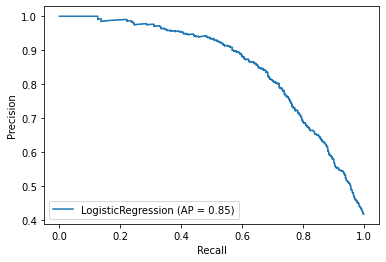

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

# plot precision-recall curve
y_pred_prob = review_classifier.predict_proba(x_test)
precision_recall_curve_values = precision_recall_curve(y_test, y_pred_prob[:,1])
plot_precision_recall_curve(estimator=review_classifier, X=x_test, y=y_test)

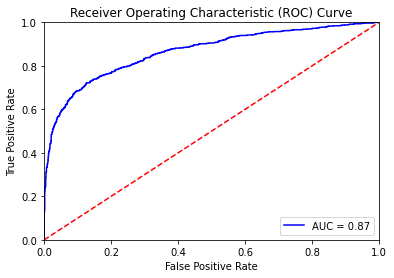

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# plot ROC
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()